In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dplypy as dp

# dataset: seaborn built-in titanic

In [2]:
data = sns.load_dataset("titanic")

In [3]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = dp.DplyFrame(data)

# row_name_subset + slice_column

In [5]:
test_df_1 = df + dp.row_name_subset(np.arange(0, 5))
test_df_3 = df + dp.row_name_subset(np.arange(0, 5)) + dp.slice_column([0, 1, 3, 4])

In [6]:
test_df_3

   survived  pclass   age  sibsp
0         0       3  22.0      1
1         1       1  38.0      1
2         1       3  26.0      0
3         1       1  35.0      1
4         0       3  35.0      0

# tail + slice_row

In [7]:
test_df_2 = df + dp.tail(6) + dp.slice_row(1, 6)
test_df_4 = dp.DplyFrame(test_df_2[["survived", "pclass", "age", "sibsp"]])

In [8]:
test_df_4

     survived  pclass   age  sibsp
886         0       2  27.0      0
887         1       1  19.0      0
888         0       3   NaN      1
889         1       1  26.0      0
890         0       3  32.0      0

# gather + pivot_table

In [9]:
test1 = (
    test_df_1
    + dp.gather(id_vars=["who"], value_vars=["fare"])
    + dp.pivot_table(index=["who"], values=["value"], aggfunc=min)
)

In [10]:
test1

       value
who         
man    7.250
woman  7.925

# one_hot + write_file

In [11]:
test2 = test_df_1 + dp.one_hot(columns=["embarked"]) + dp.write_file("one_hot.csv")

# drop + fill_na + count_null

In [12]:
test_3 = (
    test_df_1
    + dp.drop(labels=["survived", "pclass"], axis=1)
    + dp.fill_na(value={"deck": "A"})
    + dp.count_null("deck")
)

In [13]:
test_3

0

# select + mutate

In [14]:
test_4 = test_df_3 + dp.select("age > 25") + dp.mutate(np.min)

In [15]:
test_4

survived     0.0
pclass       1.0
age         26.0
sibsp        0.0

# join + drop_na

In [16]:
test_5 = test_df_3 + dp.join(test_df_4, on="pclass", how="outer") + dp.drop_na()

In [17]:
test_5

   survived_x  pclass  age_x  sibsp_x  survived_y  age_y  sibsp_y
1         0.0       3   22.0      1.0           0   32.0        0
3         1.0       3   26.0      0.0           0   32.0        0
5         0.0       3   35.0      0.0           0   32.0        0
6         1.0       1   38.0      1.0           1   19.0        0
7         1.0       1   38.0      1.0           1   26.0        0
8         1.0       1   35.0      1.0           1   19.0        0
9         1.0       1   35.0      1.0           1   26.0        0

# filter + arrange + head

In [18]:
test_6 = (
    test_df_1
    + dp.filter(test_df_1["embarked"] != "C")
    + dp.arrange(by="fare")
    + dp.head(3)
)

In [19]:
test_6

   survived  pclass     sex   age  sibsp  parch   fare embarked  class    who  adult_male deck  embark_town alive  alone
0         0       3    male  22.0      1      0  7.250        S  Third    man        True  NaN  Southampton    no  False
2         1       3  female  26.0      0      0  7.925        S  Third  woman       False  NaN  Southampton   yes   True
4         0       3    male  35.0      0      0  8.050        S  Third    man        True  NaN  Southampton    no   True

# side_effect

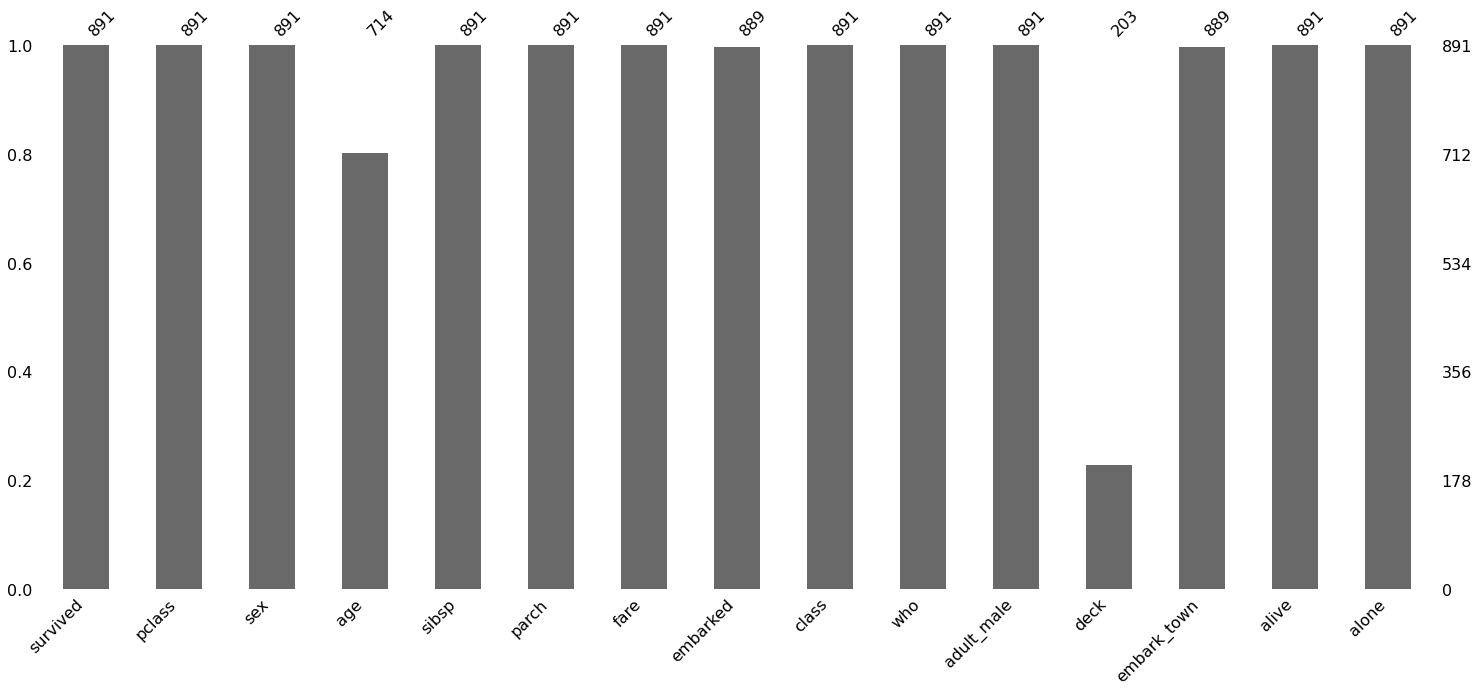

In [20]:
import missingno


def visualize_missing(df):
    missingno.bar(df.pandas_df)


test_7 = (
    df + dp.side_effect(visualize_missing) + dp.drop_na() + dp.write_file("output.csv")
)